In [2]:
import pandas as pd

# Load the metadata (replace 'metadata.csv' with the correct path)
metadata = pd.read_csv(r'ham\HAM10000_metadata.csv')
print(metadata.head())  # Inspect the first few rows


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


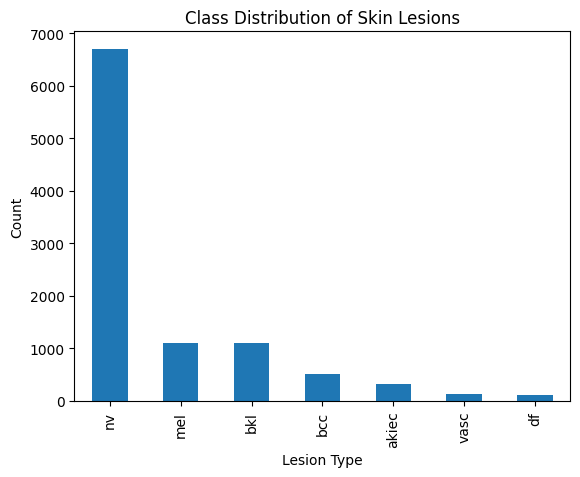

In [3]:
import matplotlib.pyplot as plt

# Plot class distribution using the 'dx' column (which contains lesion type)
metadata['dx'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Skin Lesions')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.show()


In [4]:
from PIL import Image
import os

# Load a sample image (replace 'image_folder' with the actual folder path)
image_path = os.path.join(r'ham\images', 'ISIC_0024306.jpg')  # Update with correct path
img = Image.open(image_path)
img.show()


In [5]:
import os
from PIL import Image

# Define the path to the consolidated images folder
image_folder = r'ham\images'

# Get a list of all image file paths
image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Display the total number of images loaded
print(f"Total images found: {len(image_paths)}")


Total images found: 10015


In [6]:
import pandas as pd
import os
from PIL import Image

# Paths to dataset
image_folder = r'ham/images'
metadata_path = r'ham\HAM10000_metadata.csv'

# Load metadata
metadata = pd.read_csv(metadata_path)

# Map image IDs to labels
label_map = {'bkl': 0, 'nv': 1, 'mel': 2, 'vasc': 3, 'df': 4, 'bcc': 5, 'akiec': 6}
labels = [label_map[label] for label in metadata['dx']]

# Get all image paths
image_paths = [os.path.join(image_folder, f"{img_id}.jpg") for img_id in metadata['image_id']]


In [7]:
from sklearn.model_selection import train_test_split

# Split into train and test
X_train_paths, X_test_paths, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)


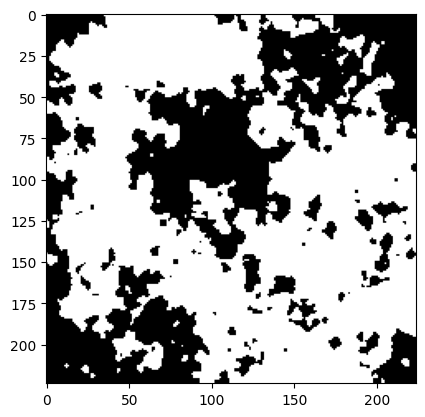

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load image
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize for consistency
    img = np.array(img)

    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian filtering
    filtered_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

    # Apply thresholding
    _, binary_img = cv2.threshold(filtered_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binary_img

# Test on a sample image
preprocessed_img = preprocess_image(X_train_paths[7])
plt.imshow(preprocessed_img, cmap='gray')
plt.show()


In [9]:
def preprocess_dataset(image_paths):
    preprocessed_images = []
    for path in image_paths:
        binary_img = preprocess_image(path)  # Apply preprocessing to each image
        preprocessed_images.append(binary_img)
    return np.array(preprocessed_images)

# Preprocess the training and testing datasets
X_train_preprocessed = preprocess_dataset(X_train_paths)
X_test_preprocessed = preprocess_dataset(X_test_paths)

# Check the shape of preprocessed data
print(f"Preprocessed training data shape: {X_train_preprocessed.shape}")
print(f"Preprocessed testing data shape: {X_test_preprocessed.shape}")


KeyboardInterrupt: 

In [23]:
def convert_to_three_channel(grayscale_images):
    # Convert each grayscale image to 3 channels by repeating the single channel
    three_channel_images = [np.repeat(img[:, :, np.newaxis], 3, axis=2) for img in grayscale_images]
    return np.array(three_channel_images)

# Convert your training and testing datasets to 3 channels
X_train_final = convert_to_three_channel(X_train_preprocessed)
X_test_final = convert_to_three_channel(X_test_preprocessed)

# Check the shape of the converted datasets
print(f"Final training data shape: {X_train_final.shape}")
print(f"Final testing data shape: {X_test_final.shape}")


Final training data shape: (8012, 224, 224, 3)
Final testing data shape: (2003, 224, 224, 3)


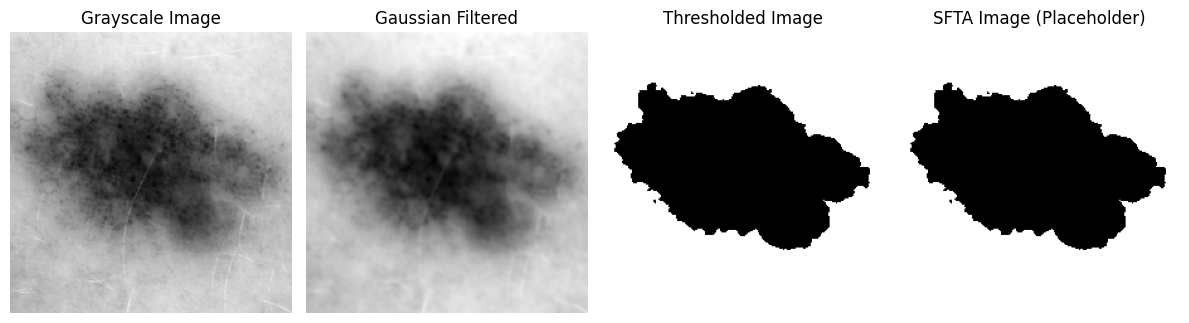

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def preprocess_and_visualize(image_path):
    # Load image
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize for consistency
    img = np.array(img)
    
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian filtering
    filtered_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    
    # Apply thresholding
    _, binary_img = cv2.threshold(filtered_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Placeholder for SFTA visualization (replace with SFTA implementation if available)
    sfta_img = binary_img  # Placeholder, SFTA would modify this further

    # Visualize the steps
    images = [gray_img, filtered_img, binary_img, sfta_img]
    titles = ['Grayscale Image', 'Gaussian Filtered', 'Thresholded Image', 'SFTA Image (Placeholder)']

    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Test on a sample image
preprocess_and_visualize(X_train_paths[0])


In [10]:
print("HELLO this is iyas")

['ham/images\\ISIC_0027223.jpg', 'ham/images\\ISIC_0032914.jpg', 'ham/images\\ISIC_0033614.jpg', 'ham/images\\ISIC_0026219.jpg', 'ham/images\\ISIC_0033900.jpg', 'ham/images\\ISIC_0031846.jpg', 'ham/images\\ISIC_0032163.jpg', 'ham/images\\ISIC_0033945.jpg', 'ham/images\\ISIC_0032329.jpg', 'ham/images\\ISIC_0025860.jpg', 'ham/images\\ISIC_0027338.jpg', 'ham/images\\ISIC_0032605.jpg', 'ham/images\\ISIC_0027008.jpg', 'ham/images\\ISIC_0030154.jpg', 'ham/images\\ISIC_0024585.jpg', 'ham/images\\ISIC_0034064.jpg', 'ham/images\\ISIC_0033560.jpg', 'ham/images\\ISIC_0024859.jpg', 'ham/images\\ISIC_0031458.jpg', 'ham/images\\ISIC_0029097.jpg', 'ham/images\\ISIC_0025782.jpg', 'ham/images\\ISIC_0030176.jpg', 'ham/images\\ISIC_0031785.jpg', 'ham/images\\ISIC_0026954.jpg', 'ham/images\\ISIC_0032986.jpg', 'ham/images\\ISIC_0033601.jpg', 'ham/images\\ISIC_0025501.jpg', 'ham/images\\ISIC_0024664.jpg', 'ham/images\\ISIC_0033622.jpg', 'ham/images\\ISIC_0033147.jpg', 'ham/images\\ISIC_0031266.jpg', 'ham/im